# Checking classical force and the orbit of mercury in two-body system

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import argrelextrema
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

### Importing perihelion position data

In [2]:
poss = np.loadtxt("../positions/mercury.txt")
#velo = np.loadtxt("../positions/mercuryvel.txt")

#poss = poss.T
#velo = velo.T

poss.shape

(3, 416)

In [3]:
rposs = np.linalg.norm(poss, 2, axis=0)
#absvel = np.linalg.norm(velo, 2, axis=0)


#local_minima_idx = argrelextrema(rposs, np.less)
local_not_zero = argrelextrema(rposs, lambda x, y: x > 0)

minrposs = rposs.take(local_not_zero)
#minabsvel = absvel.take(local_minima_idx)

print("Analytical perihelion = 0.3075")
print("Minimum perihelion    = {}".format(minrposs.min()))
print("Maximum perihelion    = {}".format(minrposs.max()))

#print("Analytical perihelion speed = 12.44")
#print("Minimum perihelion speed    = {}".format(minabsvel.min()))
#print("Maximum perihelion speed    = {}".format(minabsvel.max()))

Analytical perihelion = 0.3075
Minimum perihelion    = 0.3074999963832454
Maximum perihelion    = 0.3075000000007465


In [4]:
peri_poss = poss.take(local_not_zero, axis=1)[:, 0]

# ALL z values must be zero
assert np.sum(np.abs(peri_poss[2, :])) == 0.0

tan_peri = peri_poss[1, :] / peri_poss[0, :]
tan0 = 0 / 0.3075

peri = np.arctan(tan_peri)
peri0 = np.arctan(tan0)

arcsecond = np.pi / 648000
arcdiff = (peri[-1] - peri0) / arcsecond
print("Differnce in perihelion in arcseconds: {}".format(arcdiff))

Differnce in perihelion in arcseconds: 43.541826730020496


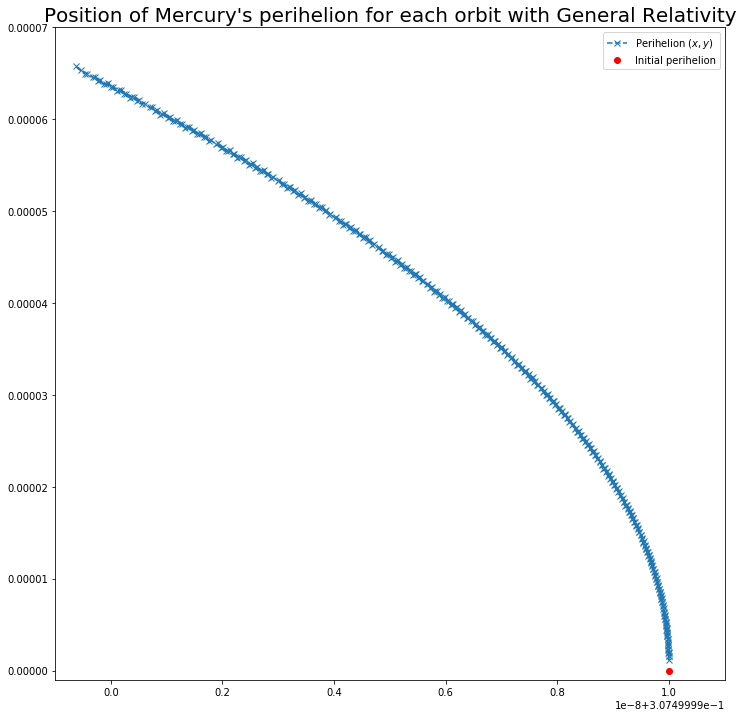

In [5]:
plt.figure(figsize=(12,12))
plt.xlim([0.307499989, 0.30749999 + 1.1e-8])
plt.ylim([0.0 - 1e-6, 0.00007])

plt.title(r"Position of Mercury's perihelion for each orbit with General Relativity",
         fontsize=20)
plt.plot(peri_poss[0, :], peri_poss[1, :], "--x", label=r"Perihelion $(x,y)$")
plt.plot([0.3075], [0.0], 'ro', label='Initial perihelion')


plt.legend()
plt.show()

-0.0021592080374483

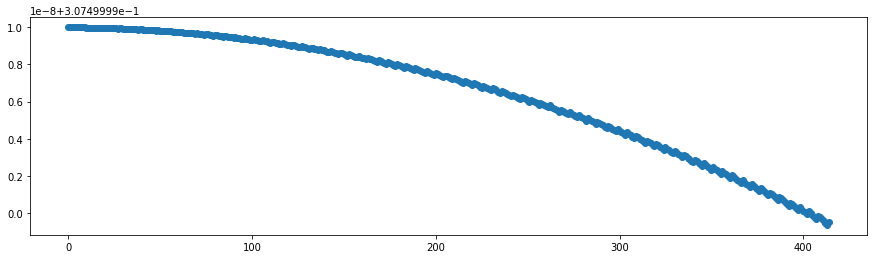

In [6]:
plt.figure(figsize=(15,4))
plt.plot(peri_poss[0, :], "--o")

(peri_poss[0, -1] - 0.3075) / arcsecond

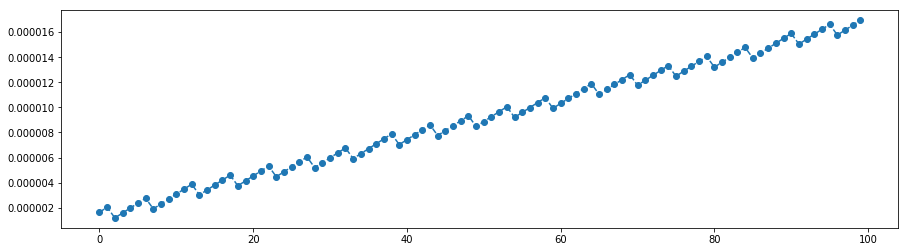

In [7]:
plt.figure(figsize=(15,4))
plt.plot(peri_poss[1, :100], "--o")

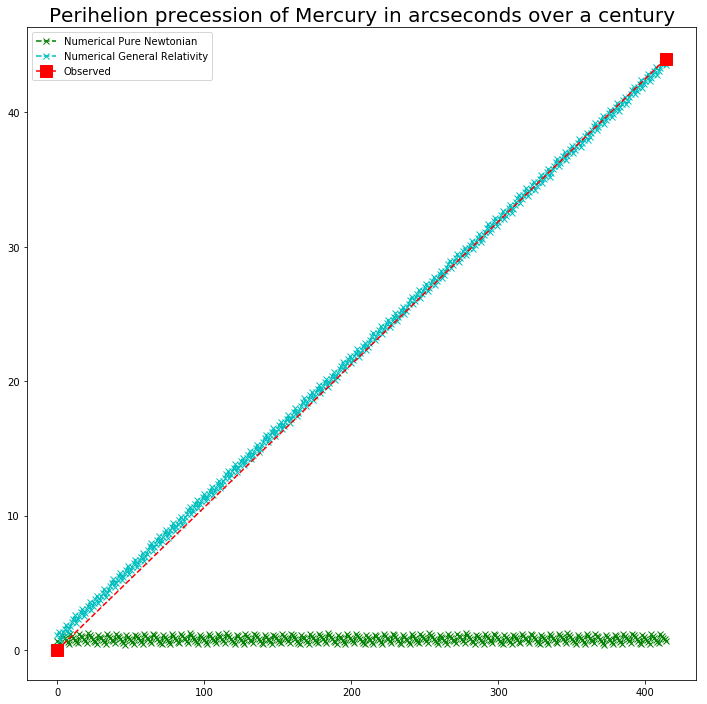

In [40]:
newton_peri = np.loadtxt("../positions/newton_arcseconds_mercury.txt")
general_peri = (peri[:] - peri0) / arcsecond

plt.figure(figsize=(12,12))
plt.title(r"Perihelion precession of Mercury in arcseconds over a century", fontsize=20)

plt.plot(newton_peri, "g--x", label='Numerical Pure Newtonian')
plt.plot(general_peri, "c--x", label='Numerical General Relativity')
plt.plot([0, len(newton_peri) - 1],[0, 44], "r--s", label="Observed", markersize=12)



plt.legend()

plt.show()